# Import Libraries

In [6]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from src.ssp.fractional_binding import SpatialSemanticPointer
from src.ssp.spatial_memory import SpatialMemory
from src.utils.visualization import plot_heatmap

Hello World
Hello World


# Add Objects

In [8]:
# Initialize
ssp = SpatialSemanticPointer(dimensions=1024, seed=42)
memory = SpatialMemory(ssp, dimensions=1024, seed=42)

# Add some objects
memory.add_object('CAT', 1.0, 1.0)
memory.add_object('DOG', -1.0, 2.0)
memory.add_object('MOUSE', 2.0, -1.5)

# Query Objects

<Figure size 800x600 with 0 Axes>

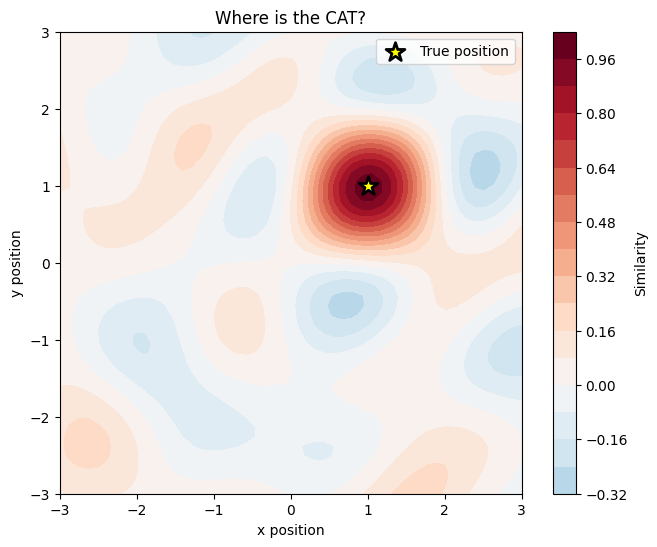

Detected: CAT, Similarity: 0.583


In [9]:
# Cat
X, Y, Z = memory.get_heatmap('CAT', bounds=(-3, 3), resolution=50)
plt.figure(figsize=(8, 6))
plot_heatmap(X, Y, Z, title="Where is the CAT?")
plt.scatter([1.0], [1.0], c='yellow', s=200, marker='*', 
            edgecolors='black', linewidths=2, label='True position')
plt.legend()
plt.show()

detected, similarity = memory.query_location(1.0, 1.0)
print(f"Detected: {detected}, Similarity: {similarity:.3f}")

<Figure size 800x600 with 0 Axes>

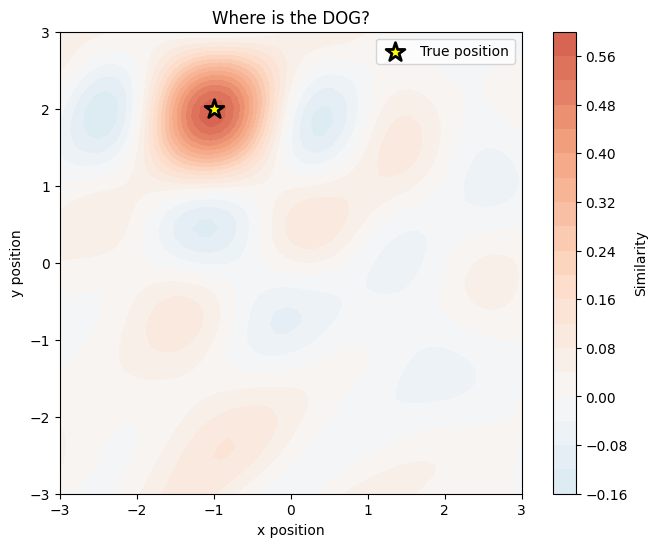

Detected: DOG, Similarity: 0.588


In [12]:
# Dog
X, Y, Z = memory.get_heatmap('DOG', bounds=(-3, 3), resolution=50)
plt.figure(figsize=(8, 6))
plot_heatmap(X, Y, Z, title="Where is the DOG?")
plt.scatter([-1.0], [2.0], c='yellow', s=200, marker='*', 
            edgecolors='black', linewidths=2, label='True position')
plt.legend()
plt.show()

detected, similarity = memory.query_location(-1.0, 2.0)
print(f"Detected: {detected}, Similarity: {similarity:.3f}")

<Figure size 800x600 with 0 Axes>

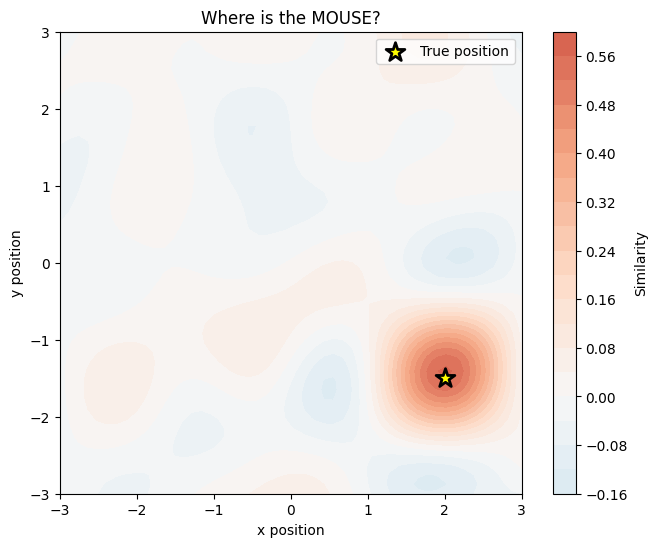

Detected: MOUSE, Similarity: 0.564


In [13]:
# Mouse
X, Y, Z = memory.get_heatmap('MOUSE', bounds=(-3, 3), resolution=50)
plt.figure(figsize=(8, 6))
plot_heatmap(X, Y, Z, title="Where is the MOUSE?")
plt.scatter([2.0], [-1.5], c='yellow', s=200, marker='*', 
            edgecolors='black', linewidths=2, label='True position')
plt.legend()
plt.show()

detected, similarity = memory.query_location(2.0, -1.5)
print(f"Detected: {detected}, Similarity: {similarity:.3f}")

# Memory

In [14]:
for obj in ['CAT', 'DOG', 'MOUSE']:
    positions = memory.query_object(obj)
    print(f"{obj}: {positions}")

CAT: [(np.float64(1.0057471264367823), np.float64(0.9827586206896559))]
DOG: [(np.float64(-1.0172413793103445), np.float64(1.9482758620689657))]
MOUSE: [(np.float64(2.005747126436782), np.float64(-1.4310344827586203))]


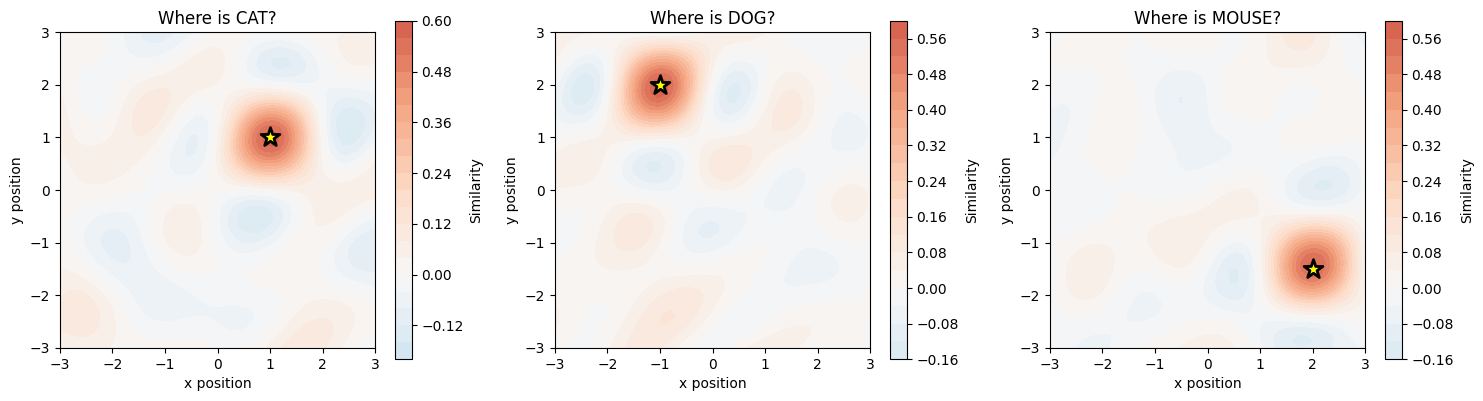

In [15]:
# Visualize initial state
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# CAT
X, Y, Z = memory.get_heatmap('CAT', bounds=(-3, 3), resolution=50)
plot_heatmap(X, Y, Z, title="Where is CAT?", ax=axes[0])
axes[0].scatter([1.0], [1.0], c='yellow', s=200, marker='*', 
                edgecolors='black', linewidths=2)

# DOG
X, Y, Z = memory.get_heatmap('DOG', bounds=(-3, 3), resolution=50)
plot_heatmap(X, Y, Z, title="Where is DOG?", ax=axes[1])
axes[1].scatter([-1.0], [2.0], c='yellow', s=200, marker='*',
                edgecolors='black', linewidths=2)

# MOUSE
X, Y, Z = memory.get_heatmap('MOUSE', bounds=(-3, 3), resolution=50)
plot_heatmap(X, Y, Z, title="Where is MOUSE?", ax=axes[2])
axes[2].scatter([2.0], [-1.5], c='yellow', s=200, marker='*',
                edgecolors='black', linewidths=2)

plt.tight_layout()
plt.show()

In [16]:
# Remove object from memory
memory.remove_object('CAT', 1.0, 1.0)

# Try to find the removed object
detected, similarity = memory.query_location(1.0, 1.0)
print(f"\nQuerying CAT's old location (1.0, 1.0):")
print(f"  Detected: {detected}")
print(f"  Similarity: {similarity:.3f}")

# Check if we can still find CAT
cat_positions = memory.query_object('CAT')
print(f"\nQuerying 'Where is CAT?': {cat_positions}")


Querying CAT's old location (1.0, 1.0):
  Detected: DOG
  Similarity: 0.032

Querying 'Where is CAT?': [(np.float64(2.1091954022988513), np.float64(-1.9482758620689649))]


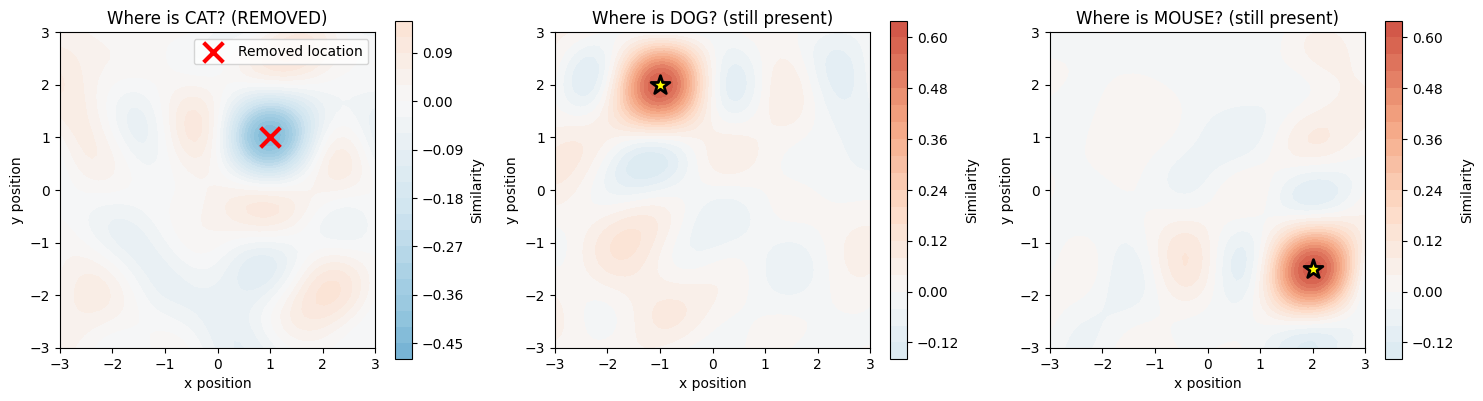

In [17]:
# Visualize after removal
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# CAT (removed)
X, Y, Z = memory.get_heatmap('CAT', bounds=(-3, 3), resolution=50)
plot_heatmap(X, Y, Z, title="Where is CAT? (REMOVED)", ax=axes[0])
axes[0].scatter([1.0], [1.0], c='red', s=200, marker='x',
                linewidths=3, label='Removed location')
axes[0].legend()

# DOG (still there)
X, Y, Z = memory.get_heatmap('DOG', bounds=(-3, 3), resolution=50)
plot_heatmap(X, Y, Z, title="Where is DOG? (still present)", ax=axes[1])
axes[1].scatter([-1.0], [2.0], c='yellow', s=200, marker='*',
                edgecolors='black', linewidths=2)

# MOUSE (still there)
X, Y, Z = memory.get_heatmap('MOUSE', bounds=(-3, 3), resolution=50)
plot_heatmap(X, Y, Z, title="Where is MOUSE? (still present)", ax=axes[2])
axes[2].scatter([2.0], [-1.5], c='yellow', s=200, marker='*',
                edgecolors='black', linewidths=2)

plt.tight_layout()
plt.show()

In [18]:
# Analyze memory trace
# Direct similarity check at CAT's old location
pos_ssp = ssp.encode_position(1.0, 1.0)
memory_similarity = ssp.similarity(memory.memory, pos_ssp)
print(f"\nDirect memory similarity at (1.0, 1.0): {memory_similarity:.3f}") #If this is non-zero theres a ghost or trace of CAT

# Check all remaining objects at CAT's location
for obj in ['DOG', 'MOUSE']:
    obj_sp = memory.vocabulary[obj]
    obj_inv = ssp.get_inverse(obj_sp)
    result = ssp.circular_convolution(memory.memory, obj_inv)
    
    cat_pos_ssp = ssp.encode_position(1.0, 1.0)
    cross_talk = ssp.similarity(result, cat_pos_ssp)
    print(f"  {obj} → CAT's location: {cross_talk:.3f}")


Direct memory similarity at (1.0, 1.0): 0.045
  DOG → CAT's location: 0.032
  MOUSE → CAT's location: -0.045
